In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#### Descision Tree

A decision tree is a versatile supervised learning algorithm used for both classification and regression tasks. It partitions the dataset into subsets based on features, creating a tree-like structure of decisions. At each node, the algorithm selects the feature that best splits the data, aiming to maximize information gain or minimize impurity.

Information gain is utilized to select the feature that best splits the data at each node of the decision tree, while entropy and Gini impurity are employed to determine how to further split the data based on the selected feature.

For binary classification, max value of entropy = 1 and gini = 0.5

For entropy, the maximum value occurs when all classes are equally likely, resulting in maximum uncertainty. In a multi-class problem with n classes, the maximum entropy value is log(n).

Similarly, for Gini impurity, the maximum value occurs when the classes are perfectly mixed, meaning each class is equally represented. In a multi-class problem with n classes, the maximum Gini impurity value is (n−1)/n.


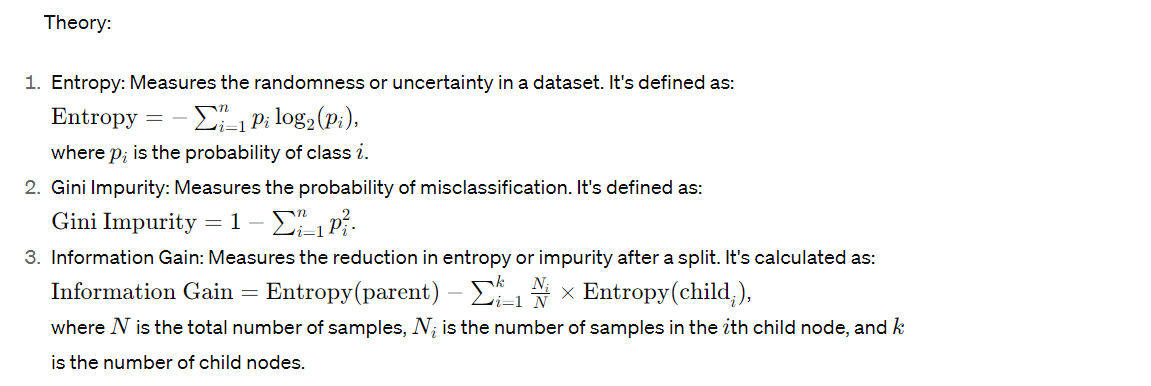

##### Advantages:
Interpretability: Decision trees are easy to interpret and visualize, making them suitable for explaining the reasoning behind predictions.
Handling Mixed Data: Decision trees can handle both numerical and categorical data without requiring extensive preprocessing.

##### Disadvantages:
Overfitting: Decision trees are prone to overfitting, especially with complex trees that capture noise in the training data.
Instability: Small variations in the data can lead to significantly different tree structures, making decision trees sensitive to changes in the dataset.

#### Descision Tree Code

Accuracy: 1.0
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



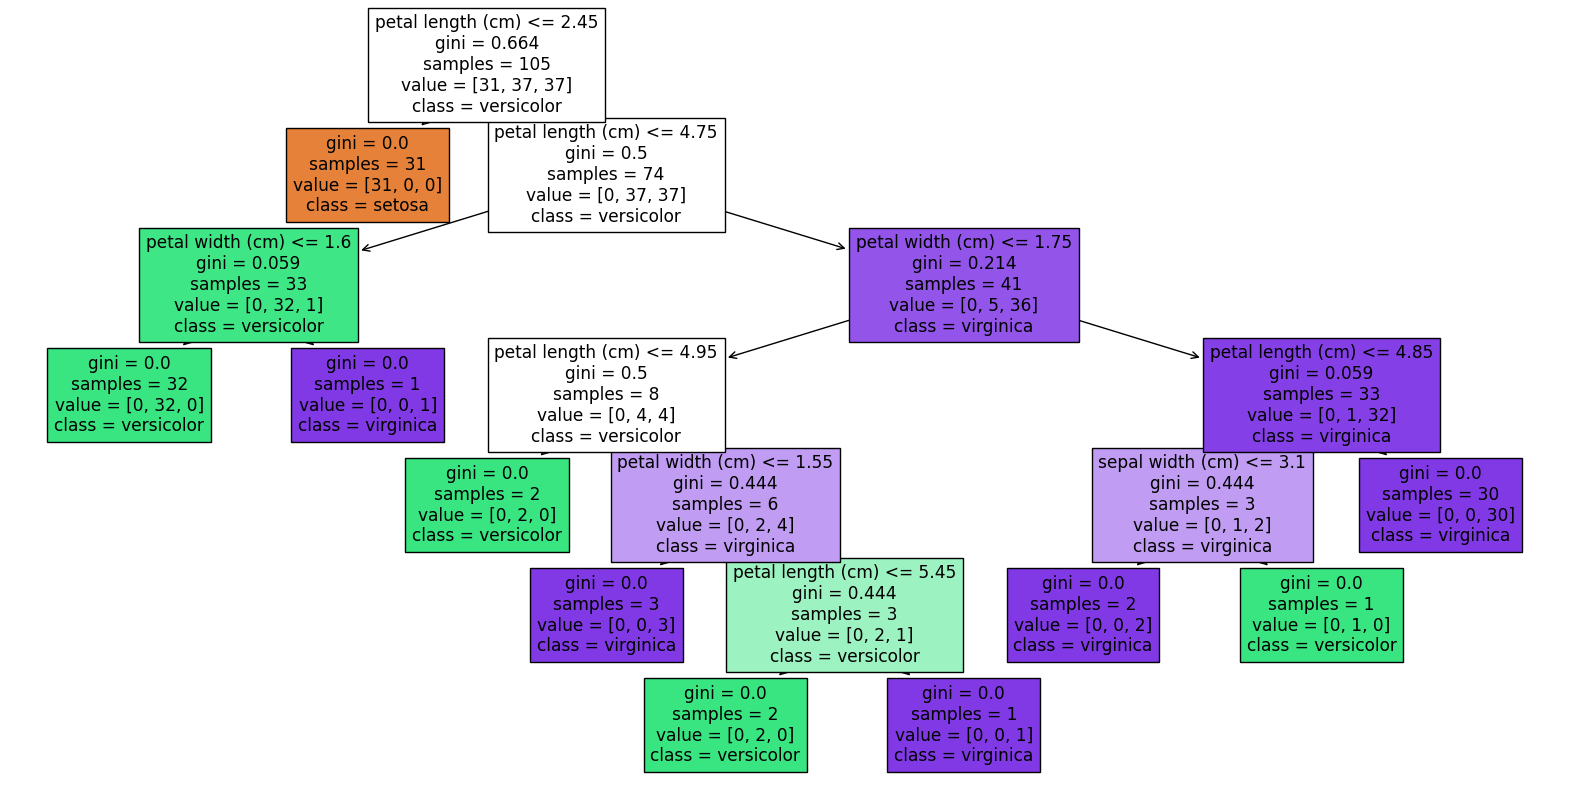

Cross-validated Accuracy: 0.9533333333333334


In [2]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the decision tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Make predictions
predictions = tree_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

# Cross-validation
cross_val_accuracy = np.mean(cross_val_score(tree_model, X, y, cv=5, scoring='accuracy'))
print(f"Cross-validated Accuracy: {cross_val_accuracy}")

#### Descision Tree with Hyperparameter Tuning and Prunning

Best parameters for Decision Tree: {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}
Best score for Decision Tree: 0.95
Accuracy on test set (Decision Tree): 1.0


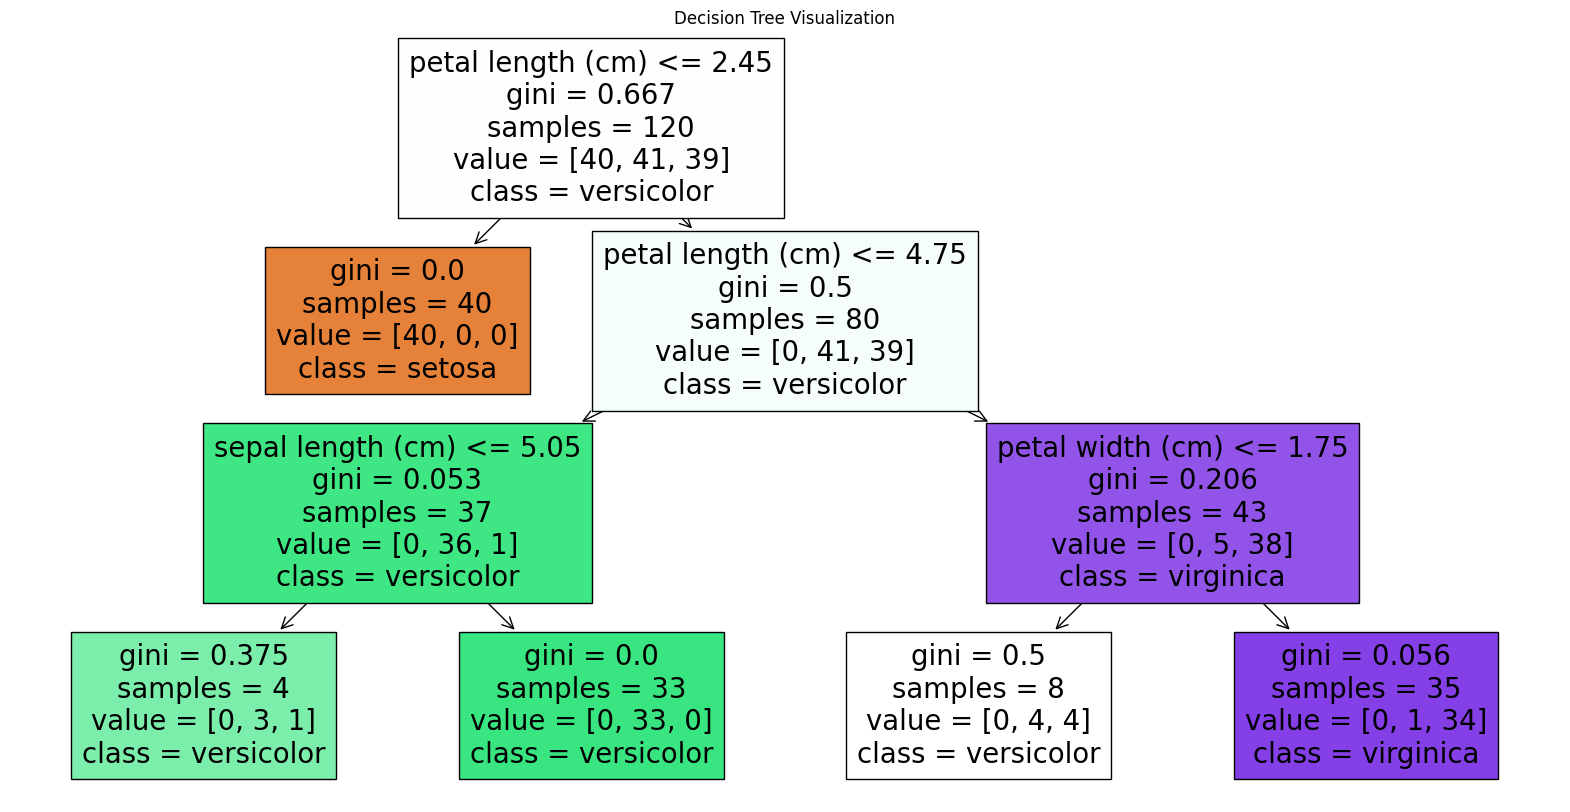

In [3]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for pre-pruning
param_grid = {
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 5),
}

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search_dt = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search_dt.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best score for Decision Tree:", grid_search_dt.best_score_)

# Evaluate on the test set
dt_best = grid_search_dt.best_estimator_
predictions_dt = dt_best.predict(X_test)
print("Accuracy on test set (Decision Tree):", accuracy_score(y_test, predictions_dt))

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_best, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree Visualization")
plt.show()